In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df= pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
cdf=df[['ENGINESIZE','CYLINDERS','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,CO2EMISSIONS
0,2.0,4,196
1,2.4,4,221
2,1.5,4,136
3,3.5,6,255
4,3.5,6,244


In [4]:
msk=np.random.rand(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])

In [5]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures 

poly= PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.   ,  2.   ,  4.   ,  8.   ],
       [ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       ...,
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

In [40]:
regr= linear_model.LinearRegression()
train_=regr.fit(train_x_poly,train_y)
print('cofficient:-',regr.coef_)
print('intercept:-',regr.intercept_)
print(train_)

cofficient:- [[ 0.         29.81823661  4.35357524 -0.50560764]]
intercept:- [128.32888526]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


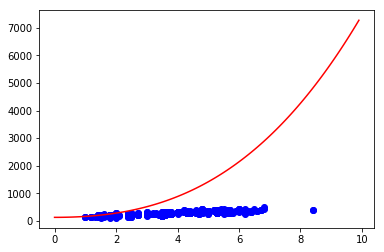

In [41]:
test_x_poly= poly.fit_transform(test_x)
test_y_hat= regr.predict(test_x_poly)

#plotting the hypothesis

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
XX= np.arange(0,10,0.1)
YY=regr.intercept_+ (regr.coef_[0][0]*XX)+(regr.coef_[0][1]*(XX**2))+(regr.coef_[0][2]*(XX**3))
plt.plot(XX,YY,'r')
plt.show()

In [42]:
from sklearn.metrics import r2_score
print('mean absolute error :-',np.mean(np.absolute(test_y_hat-test_y)))

print('residual sum of squares :-', np.mean((test_y_hat-test_y)**2))

print('R2 score :- ', r2_score(test_y_hat, test_y)) 

mean absolute error :- 24.89849699035712
residual sum of squares :- 996.17798490707
R2 score :-  0.6690382571443714
